# Détection des sources sismiques

In [1]:
import pandas as pd
import numpy as np
import struct
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
matplotlib.rcParams['figure.figsize'] = (20, 10)

## Chargement des données

In [9]:
from os import listdir
from os.path import isfile, join

mypath = "SUHA_Paris2017"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [ ]:
n_elems = n1_convH * n2_convH * n3_convH
filename = "SUHA_Paris2017/conBR_ir050_tostack.rsf@"
f = open(filename, "rb")

data = struct.unpack('f' * n_elems, f.read(4 * n_elems))

In [50]:
n1_convH = 75
n2_convH = 5400
n3_convH = 100

## Représentation des traces sismiques après convolution

In [46]:
convH = np.reshape(data, (n3_convH, n2_convH, n1_convH))

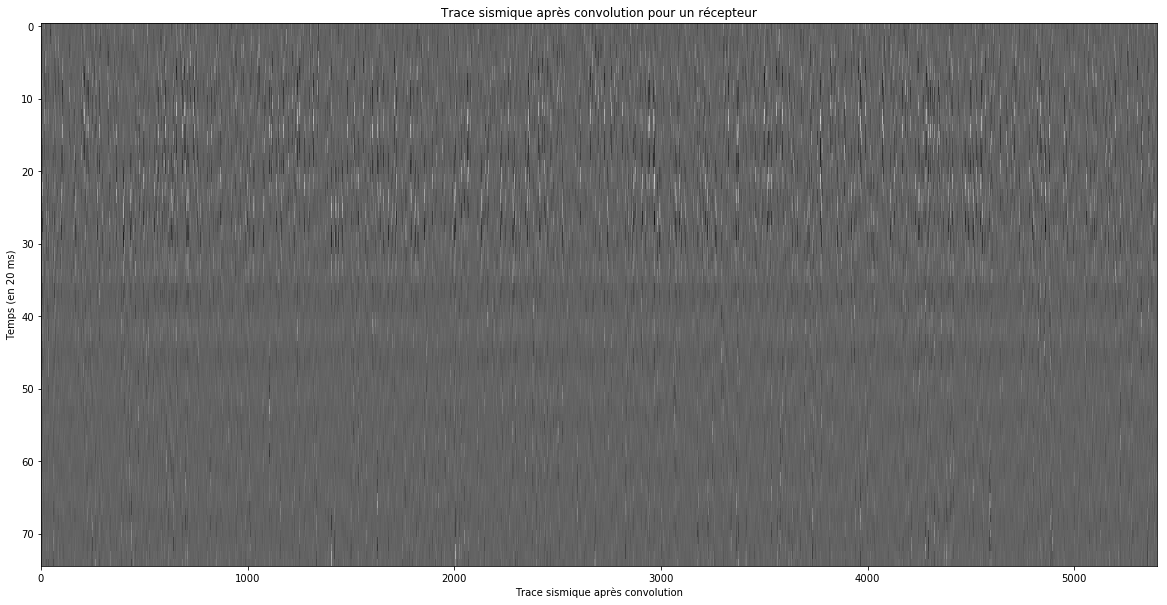

In [49]:
plt.close('all')
plt.imshow(convH[10].T, cmap='gray', aspect="auto")
plt.xlabel("Trace sismique après convolution")
plt.ylabel("Temps (en 20 ms)")
plt.title("Trace sismique après convolution pour un récepteur")
plt.show()

In [86]:
def compute_cumulative_sums(data, n_tracesByGroups=20):
    """
    Calculer la somme cumulée des traces par groupe de 20
    """
    n3, n2, n1 = data.shape
    n_tracesByGroups = 20
    n_groups = int(n2 / n_tracesByGroups)
    
    sum_traces_grouped = np.zeros((n3, n_groups, n1))
    sum_traces = np.zeros((n3, n1))
    
    for receiver in range(n3):
        traces = data[receiver]
        sum_traces[receiver, :] = traces.sum(axis=0)
        for n_group in range(n_groups):
            start = n_tracesByGroups * n_group
            stop = n_tracesByGroups * (n_group + 1)
            sum_traces_grouped[receiver, n_group, :] = traces[start:stop, :].sum(axis=0)
    
    return sum_traces, sum_traces_grouped

In [115]:
def compute_SSE(u_vgt, u):
    """
    Calculer la somme de l'écart quadratique
    """
    n3, n2, n1 = u.shape
    SSE = np.zeros((n3))
    for receiver in range(n3):
        # print(u_vgt[receiver].shape)
        # print(u[receiver].shape)
        # SSE[receiver] = ((u_vgt[receiver] - u[receiver]) ** 2).sum(axis=0)
        print(((u_vgt[receiver] - u[receiver]) ** 2).sum(axis=0))
    print(u_vgt[receiver, 0])
    print(u[receiver, :10, 0])
    print((u_vgt[receiver] - u[receiver])[:10, 0])
    return SSE

In [87]:
sum_traces, sum_traces_grouped = compute_cumulative_sums(convH, n_tracesByGroups=20)

In [116]:
L = compute_SSE(sum_traces, sum_traces_grouped)

[  1.45911085e+09   2.07457749e+09   1.89402791e+08   9.78752545e+09
   2.82586489e+09   2.50964695e+07   5.18384363e+06   1.85692252e+07
   2.26121763e+09   3.40469506e+09   8.72971748e+07   6.40669162e+08
   4.81034056e+06   4.27974040e+08   3.79199420e+09   1.76611450e+09
   5.76927360e+06   8.89845243e+07   1.50846785e+08   9.09845462e+08
   5.25199258e+09   4.07090500e+09   1.59362310e+09   2.00553194e+07
   3.76226880e+09   7.64676169e+09   5.11073871e+09   5.67717310e+09
   1.10522678e+09   4.40093414e+09   1.33797888e+10   8.48827606e+09
   6.47706878e+09   4.65377935e+09   1.70104048e+09   2.88508390e+10
   2.89955462e+10   3.14199594e+09   1.48145430e+09   8.85855847e+09
   4.29691156e+10   4.28647262e+10   1.14358054e+08   4.60412795e+10
   4.59297424e+10   1.04545513e+10   1.71469606e+08   1.32067695e+10
   2.27499450e+10   2.40958424e+09   2.25027951e+09   5.56330009e+09
   3.84214435e+09   6.99714386e+07   1.35998010e+09   8.41300506e+09
   3.87639367e+09   3.42947746e+09

In [ ]:
n1 = 94
n2 = 1 # Sommer sur 20 traces sismiques ou plus
n3 = 100
n_elems = n1 * n2 * n3
filename = "../../sumH_r150_ensm.rsf@"
f = open(filename, "rb")
data = f.read(4*n_elems)
sumH = np.reshape(struct.unpack('f' * n_elems, data), (n1, n2))
plt.plot(sumH, 'o')
plt.show()

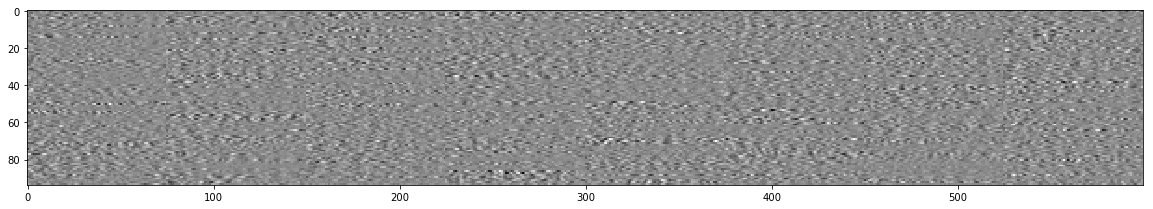

In [10]:
n1_convH = 600
n2_convH = 94
n1 = 600 # 150
f1 = 0 # 30
n_elems = n1_convH*n2_convH
filename = "SUHA_Paris2017/conBR_ir050_tostack.rsf@"
f = open(filename, "rb")
convH = np.reshape(struct.unpack('f' * n_elems, f.read(4*n_elems)), (n2_convH, n1_convH))[:, f1:n1]
plt.imshow(convH,cmap='gray')
plt.show()

# convH
# Un seul récepteur
# Les sources envoient un signal de manière aléatoire au cours du temps (6h)
# Relevés toutes les 12 secondes
# Convolution calculé par segement de 12 secondes sur les 6 heures

# Le graphe représente les mesures sur 12 secondes: 2.4 sec / 0.02 => 1 relevé toutes le 20ms => 120 valeurs
# Somme des valeurs des données
# En ordonnée, identifiant de la trace sismique après la convolution

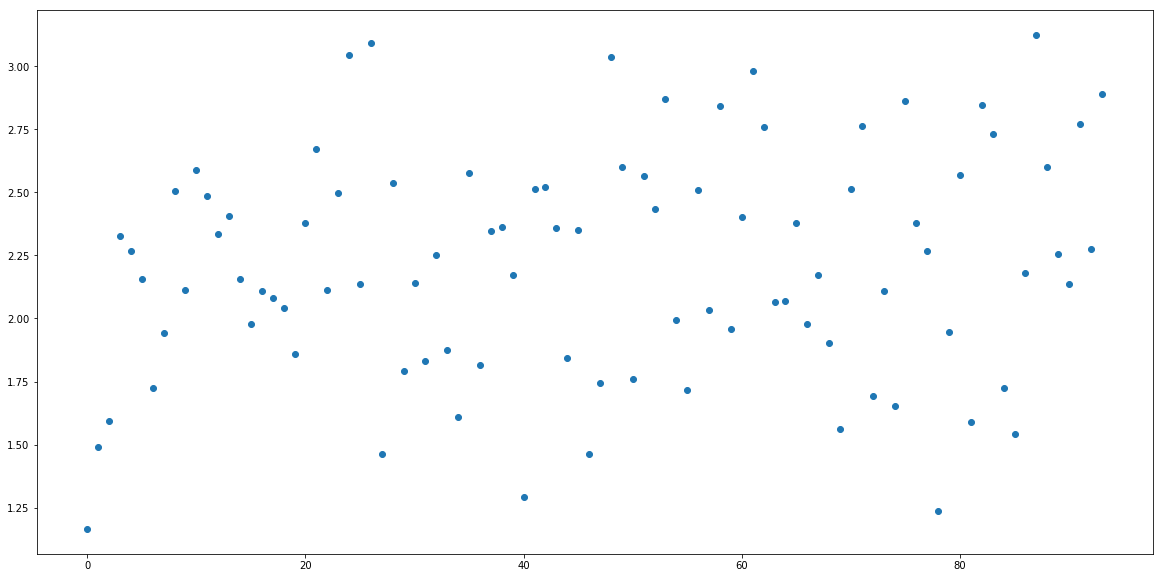

In [4]:
n1 = 94
n2 = 1
n_elems = n1*n2
filename = "../../sumH_r150_ensm.rsf@"
f = open(filename, "rb")
data = f.read(4*n_elems)
sumH = np.reshape(struct.unpack('f' * n_elems, data), (n1,n2))
plt.plot(sumH, 'o')
plt.show()

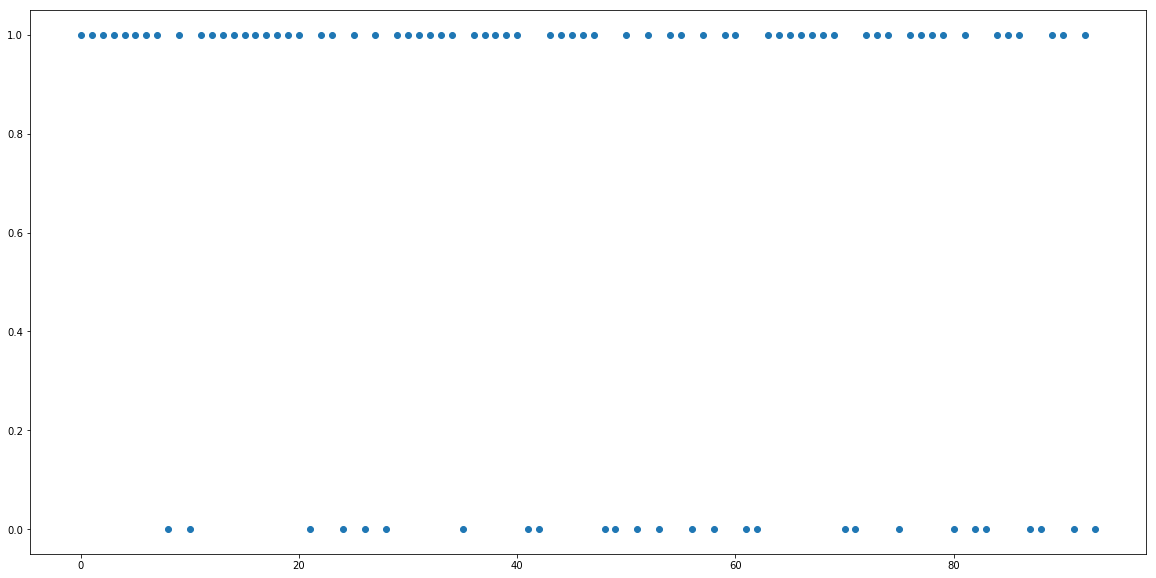

In [5]:
y_todf = np.zeros(sumH.shape)
y_todf = y_todf + (sumH < 2.5).astype(np.int)
plt.plot(y_todf, 'o')
plt.show()
# Classe 0: la ligne ressemble à la sommation des 6 heures
# Classe 1: la ligne ne ressemble pas à la sommation des 6 heures

In [6]:
from tsfresh import extract_features
from tsfresh.feature_extraction import ComprehensiveFCParameters
from tsfresh.utilities.dataframe_functions import impute
extraction_settings = ComprehensiveFCParameters()
extraction_settings.IMPUTE = impute # Interpolation pour éviter les valeurs NaN

In [7]:
master_df = pd.DataFrame(convH[0])
master_df['id'] = 0
print(master_df.shape)
for ii in range(1,len(convH[:, 0])):
    temp_df = pd.DataFrame(convH[ii])
    temp_df['id'] = ii
    master_df = pd.DataFrame(np.vstack([master_df,temp_df]))
print(master_df.tail())

(120, 2)
              0     1
11275 -0.165165  93.0
11276  0.466347  93.0
11277  1.064036  93.0
11278  1.769333  93.0
11279  1.032505  93.0


In [ ]:
# 120 * 94 -1 = 11279
# Construction d'un data frame pour extraire les caractéristiques
# Variance, min, max,  nombre de pics (cf. tsfresh)
# Traces sismique colonne 

In [67]:
%time X = extract_features(master_df, column_id=1, default_fc_parameters=extraction_settings)
print(X.shape)
X

Feature Extraction: 100%|██████████| 94/94 [00:09<00:00,  9.44it/s]

CPU times: user 252 ms, sys: 48 ms, total: 300 ms
Wall time: 10 s
(94, 222)


,0__variance_larger_than_standard_deviation,0__has_duplicate_max,0__has_duplicate_min,0__has_duplicate,0__sum_values,0__mean_autocorrelation,0__augmented_dickey_fuller,0__abs_energy,0__mean_abs_change,0__mean_change,...,0__fft_coefficient__coeff_4,0__fft_coefficient__coeff_5,0__fft_coefficient__coeff_6,0__fft_coefficient__coeff_7,0__fft_coefficient__coeff_8,0__fft_coefficient__coeff_9,0__friedrich_coefficients__m_3__r_30__coeff_3,0__friedrich_coefficients__m_3__r_30__coeff_2,0__friedrich_coefficients__m_3__r_30__coeff_1,0__friedrich_coefficients__m_3__r_30__coeff_0
1,,,,,,,,,,,,,,,,,,,,,
10.0,1.0,0.0,0.0,0.0,-1.446763,0.286724,-9.410066,148.109558,0.783317,0.005679,...,1.459987,0.753901,0.659725,0.060152,0.652085,-0.254305,0.013679,-0.041859,-0.397537,0.046672
11.0,1.0,0.0,0.0,0.0,-2.960668,0.425585,-6.868699,160.696325,0.697844,-0.006401,...,-2.716397,-0.452094,-0.981550,-0.202185,-0.393602,0.288464,-0.035177,-0.009922,-0.174466,0.003262
12.0,1.0,0.0,0.0,0.0,2.150517,0.306039,-7.095129,149.222054,0.749217,-0.004220,...,2.726066,-0.506684,-0.219227,1.171101,0.257460,-0.594834,-0.015706,-0.013025,-0.301987,0.018213
13.0,1.0,0.0,0.0,0.0,-0.009375,0.316155,-4.089142,157.159932,0.780241,0.001904,...,0.865601,0.847466,0.255534,-0.472765,0.515770,0.142521,-0.025445,0.003096,-0.267100,0.001493
14.0,1.0,0.0,0.0,0.0,-2.930193,0.210595,-7.211826,157.060035,0.818429,0.009955,...,-3.919362,-1.048196,-0.734180,-0.609675,-1.598431,-0.702894,-0.026777,0.018274,-0.298411,-0.023854
5.0,1.0,0.0,0.0,0.0,3.428915,0.394127,-5.928163,149.858970,0.681446,0.005151,...,1.000768,-0.441537,-0.535701,-1.122296,-0.890292,-1.287666,-0.020937,-0.017997,-0.220430,0.037375
6.0,1.0,0.0,0.0,0.0,-5.514065,0.402605,-6.973257,154.826932,0.708994,-0.008842,...,0.150130,-0.336303,-0.872852,-0.356606,-0.574831,-0.620801,-0.000067,-0.006352,-0.269548,-0.004960
7.0,1.0,0.0,0.0,0.0,-0.819714,0.294038,-5.630848,141.788556,0.746165,-0.002019,...,-2.314270,-1.205296,-1.447147,-0.824290,-0.763837,-1.177160,-0.005875,-0.001655,-0.318263,0.000853
8.0,1.0,0.0,0.0,0.0,-2.010064,0.416898,-6.927183,149.495072,0.677450,0.008233,...,-0.666717,-1.536438,-0.414670,-0.093142,-0.289186,-0.775828,-0.002484,-0.008079,-0.266325,0.019407


In [9]:
y = pd.DataFrame(y_todf)
print(y.shape)
y.tail()

(94, 1)


,0
89,1.0
90,1.0
91,0.0
92,1.0
93,0.0


In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report

/opt/miniconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
cl = DecisionTreeClassifier()
cl.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [13]:
print(classification_report(y_test, cl.predict(X_test)))

             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00         1
        1.0       0.93      0.72      0.81        18

avg / total       0.88      0.68      0.77        19



In [14]:
print(y_test.values.ravel())
print(cl.predict(X_test))

[ 1.  1.  1.  1.  1.  1.  1.  1.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.]
[ 1.  1.  1.  1.  1.  1.  0.  0.  1.  1.  1.  1.  0.  0.  1.  0.  1.  1.
  1.]


In [15]:
X1 = pd.DataFrame(convH)
X1.shape

(94, 120)

In [16]:
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y,test_size=0.2)

In [17]:
print(y1_test)

      0
14  1.0
82  0.0
42  0.0
16  1.0
9   1.0
10  0.0
93  0.0
71  0.0
90  1.0
28  0.0
43  1.0
19  1.0
84  1.0
31  1.0
56  0.0
37  1.0
47  1.0
73  1.0
11  1.0


In [18]:
cl1 = DecisionTreeClassifier()
cl1.fit(X1_train, y1_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [19]:
print(classification_report(y1_test,cl1.predict(X1_test)))

             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00         7
        1.0       0.59      0.83      0.69        12

avg / total       0.37      0.53      0.44        19



In [20]:
print(y1_test.values.ravel())
print(cl1.predict(X1_test))

[ 1.  0.  0.  1.  1.  0.  0.  0.  1.  0.  1.  1.  1.  1.  0.  1.  1.  1.
  1.]
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  1.  0.  1.  1.  1.  1.  1.
  1.]


In [21]:
from sklearn.ensemble import BaggingClassifier

In [22]:
tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree,n_estimators=150,max_samples=0.8,random_state=1)
bag.fit(X_train,y_train.values.ravel())

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=0.8, n_estimators=150, n_jobs=1, oob_score=False,
         random_state=1, verbose=0, warm_start=False)

In [23]:
print(classification_report(y_test.values.ravel(),bag.predict(X_test)))

             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00         1
        1.0       0.94      0.94      0.94        18

avg / total       0.89      0.89      0.89        19



In [24]:
print(y_test.values.ravel())
print(bag.predict(X_test))

[ 1.  1.  1.  1.  1.  1.  1.  1.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.]
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  1.  1.
  1.]


In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
model = RandomForestClassifier(n_estimators=150,random_state=0)

In [27]:
model.fit(X_train,y_train.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=150, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [28]:
print(classification_report(y_test.values.ravel(),model.predict(X_test)))

             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00         1
        1.0       0.94      0.89      0.91        18

avg / total       0.89      0.84      0.87        19



In [29]:
print(y_test.values.ravel())
print(model.predict(X_test))

[ 1.  1.  1.  1.  1.  1.  1.  1.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.]
[ 0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  1.  1.
  1.]


In [30]:
print(y.values.ravel()[65:75])
print(model.predict(X)[65:75])

[ 1.  1.  1.  1.  1.  0.  0.  1.  1.  1.]
[ 1.  1.  1.  1.  1.  0.  0.  1.  1.  1.]


In [31]:
print(y[65:75])

      0
65  1.0
66  1.0
67  1.0
68  1.0
69  1.0
70  0.0
71  0.0
72  1.0
73  1.0
74  1.0


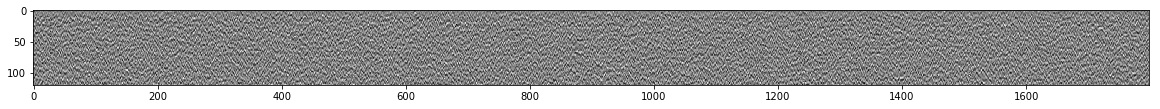

In [69]:
n1 = 600
n2 = 1799
n1_new = 150
f1_new = 30
n_elems = n1*n2
filename = "../../convH_r150_tostack_agc_noise.rsf@"
f = open(filename,"rb")
convH_comp_nonoise = np.reshape(struct.unpack('f'*n_elems,f.read(4*n_elems)),(n2,n1))[:,f1_new:n1_new]
plt.imshow(convH_comp_nonoise[:,:].transpose(),cmap='gray')
plt.show()

# Les ordonnées représente la trace sisimique sur 2.4 seconde (120 valeurs) après la convolution
# Les abscisses le temps (6h)
# Avec bruit

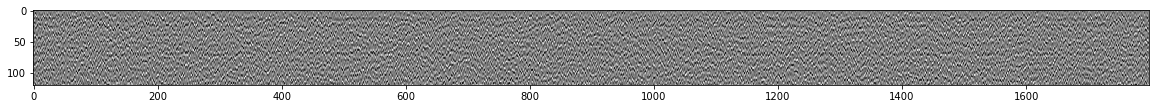

In [70]:
n1 = 600
n2 = 1799
n1_new = 150
f1_new = 30
n_elems = n1*n2
filename = "../../convH_r150_tostack_agc.rsf@"
f = open(filename,"rb")
convH_comp = np.reshape(struct.unpack('f'*n_elems,f.read(4*n_elems)),(n2,n1))[:,f1_new:n1_new]
plt.imshow(convH_comp[:,:].transpose(),cmap='gray')
plt.show()
# Même chose que précédement mais sans bruit

In [71]:
master_comp_df= pd.DataFrame(convH_comp[0])
master_comp_df['id'] = 0
print(master_comp_df.shape)
for ii in range(1,len(convH_comp[:,0])):
    temp_df = pd.DataFrame(convH_comp[ii])
    temp_df['id'] = ii
    master_comp_df = pd.DataFrame(np.vstack([master_comp_df,temp_df]))
print(master_comp_df.tail())

(120, 2)
               0       1
215875 -0.328109  1798.0
215876 -0.318618  1798.0
215877  0.197352  1798.0
215878  1.279333  1798.0
215879  2.315403  1798.0


In [72]:
%time X_comp = extract_features(master_comp_df, column_id=1, default_fc_parameters=extraction_settings)
print(X_comp.shape)

Feature Extraction: 100%|██████████| 1799/1799 [03:03<00:00,  9.82it/s] 

CPU times: user 4.2 s, sys: 132 ms, total: 4.33 s
Wall time: 3min 3s
(1799, 222)


In [73]:
X_comp = impute(X_comp)

In [74]:
print(np.sum(model.predict(X_comp)),len(model.predict(X_comp)))

1106.0 1799


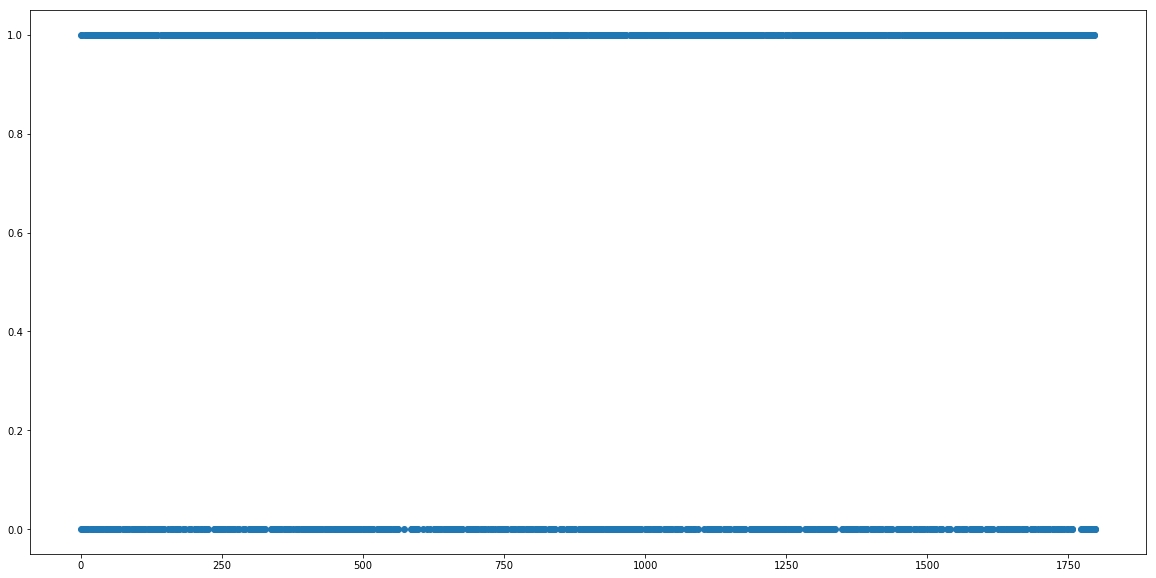

In [75]:
plt.plot(model.predict(X_comp), 'o')
plt.show()

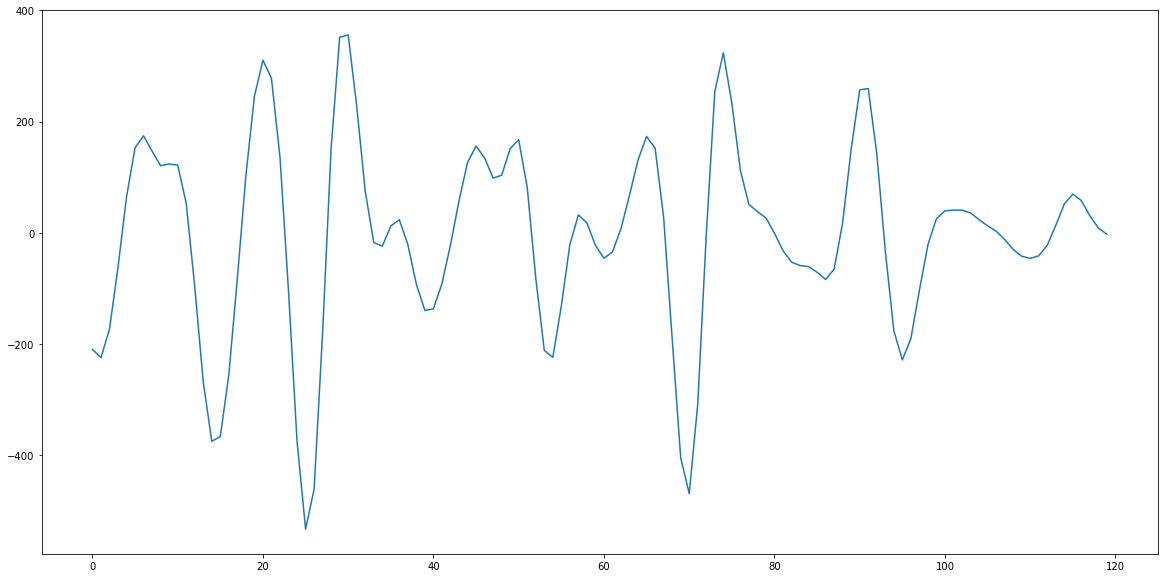

In [76]:
model_indices = np.array(model.predict(X_comp))
plt.plot(np.sum(convH_comp[ii,:] for ii in range(len(convH_comp[:,0])) if model_indices[ii]))
plt.show()
# Sommation des valeurs pour le bonnes traces

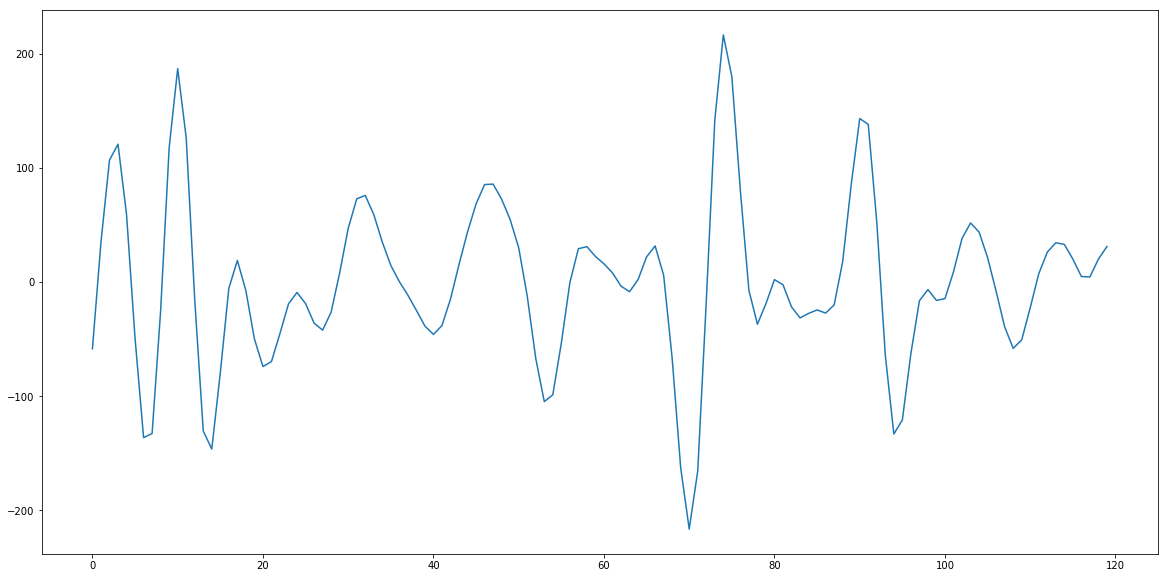

In [77]:
model_indices = np.array(model.predict(X_comp))
plt.plot(np.sum(convH_comp[ii,:] for ii in range(len(convH_comp[:,0])) if not model_indices[ii]))
plt.show()
# Sommation des valeurs pour les mauvaises traces

In [78]:
# Même chose mais en normalisant
f1 = 0
n1 = 120
stkH_comp = np.sum(convH_comp[:,f1:(f1+n1)],axis=0)/np.amax(np.sum(convH_comp[:,f1:(f1+n1)],axis=0)) 
stkH_comp_nonoise = np.sum(convH_comp_nonoise[:,f1:(f1+n1)],axis=0)/np.amax(np.sum(convH_comp_nonoise[:,f1:(f1+n1)],axis=0))

Model with noise variance of 1.e-14.

In [79]:

##model_indices = np.array(model.predict(X_comp))
#nn = len(convH_comp[:,0])
##nn = 800
##stkH_model = np.sum(convH_comp[ii,f1:(f1+n1)] for ii in range(nn) if model_indices[ii])
##stkH_nomodel = np.sum(convH_comp[ii,f1:(f1+n1)] for ii in range(nn) if not model_indices[ii])

##plt.plot(stkH_nomodel/np.amax(stkH_nomodel))
##plt.plot(stkH_model/np.amax(stkH_model))
#plt.plot(stkH_comp,'b--')
#plt.plot(stkH_comp_nonoise)
#plt.show()

Model with noise variance of 1e-15

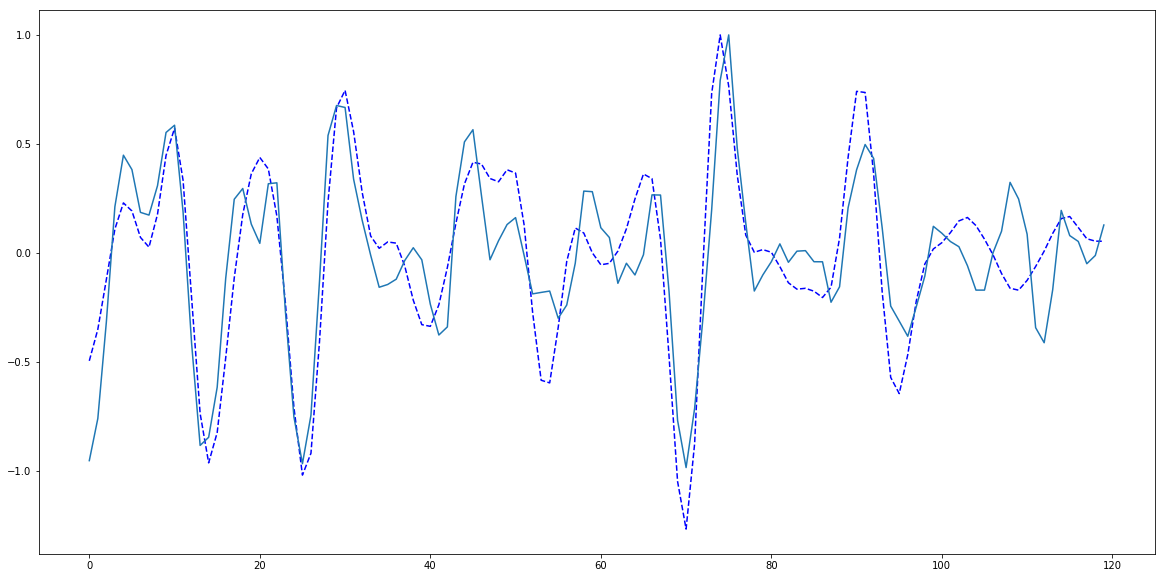

In [80]:
#model_indices = np.array(model.predict(X_comp))
nn = len(convH_comp[:,0])
#nn = 800
#stkH_model = np.sum(convH_comp[ii,f1:(f1+n1)] for ii in range(nn) if model_indices[ii])
#stkH_nomodel = np.sum(convH_comp[ii,f1:(f1+n1)] for ii in range(nn) if not model_indices[ii])

#plt.plot(stkH_nomodel/np.amax(stkH_nomodel))
#plt.plot(stkH_model/np.amax(stkH_model))
plt.plot(stkH_comp,'b--')
plt.plot(stkH_comp_nonoise)
plt.show()

In [81]:
#print(np.sum(np.square(np.subtract((stkH_nomodel/np.amax(stkH_nomodel)),stkH_comp))))
#print(np.sum(np.square(np.subtract((stkH_model/np.amax(stkH_model)),stkH_comp))))
print(np.sum(np.square(np.subtract(stkH_comp,stkH_comp_nonoise))))
print(np.sum(np.square(np.subtract(stkH_comp_nonoise,stkH_comp_nonoise))))

5.82327240837
0.0


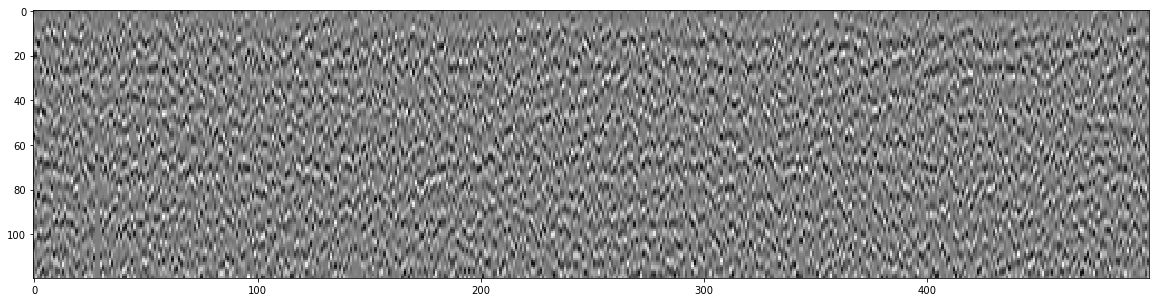

In [82]:
convH_model = np.array([convH_comp[ii,f1:(f1+n1)] for ii in range(nn) if model_indices[ii]])
plt.imshow(convH_model[:500,:].transpose(),cmap='gray')
plt.show()

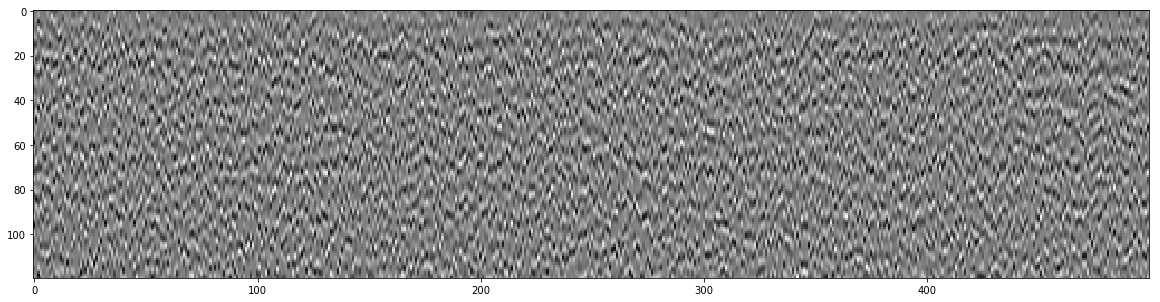

In [83]:
convH_nomodel = np.array([convH_comp[ii,f1:(f1+n1)] for ii in range(nn) if not model_indices[ii]])
plt.imshow(convH_nomodel[:500,:].transpose(),cmap='gray')
plt.show()

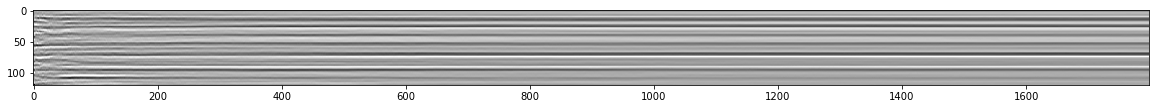

In [84]:
#print(len(convH_comp[:,0]))
nrand = len(convH_comp[:,0])
#nrand = 200
list_torand = list(range(len(convH_comp[:,0])))
list_rand = []
list_rand_model = []
list_rand_nomodel = []
sum_convH_rand = np.zeros((convH_comp[0].size,nrand))
subs_convRand_stk = np.zeros((convH_comp[0].size,nrand))
sum_model_rand = np.zeros((convH_comp[0].size,nrand))
subs_modelRand_stk = np.zeros((convH_comp[0].size,nrand))
sum_nomodel_rand = np.zeros((convH_comp[0].size,nrand))
subs_nomodelRand_stk = np.zeros((convH_comp[0].size,nrand))
for it in range(nrand):
    it_rand = list_torand[np.random.randint(0,len(list_torand))]
    list_torand.remove(it_rand)
    list_rand.append(it_rand)
    temp_sum = np.sum(convH_comp[list_rand,f1:f1+n1],axis=0)
    sum_convH_rand[:,it] = sum_convH_rand[:,it] + temp_sum/np.amax(temp_sum)
    subs_convRand_stk[:,it] = sum_convH_rand[:,it] - stkH_comp
    if model_indices[it_rand]:
        list_rand_model.append(it_rand)
        temp_sum_model = np.sum(convH_comp[list_rand_model,f1:f1+n1],axis=0)
        sum_model_rand[:,it] = sum_model_rand[:,it] + temp_sum_model/np.amax(temp_sum_model)
        if it != 0:
            sum_nomodel_rand[:,it] = sum_nomodel_rand[:,it-1]
        else:
            sum_nomodel_rand[:,it] = 0
    else:
        list_rand_nomodel.append(it_rand)
        temp_sum_nomodel = np.sum(convH_comp[list_rand_nomodel,f1:f1+n1],axis=0)
        sum_nomodel_rand[:,it] = sum_nomodel_rand[:,it] + temp_sum_nomodel/np.amax(temp_sum_nomodel)
        if it != 0:
            sum_model_rand[:,it] = sum_model_rand[:,it-1]
        else:
            sum_model_rand[:,it] = 0
    subs_modelRand_stk[:,it] = sum_model_rand[:,it] - stkH_comp
    subs_nomodelRand_stk[:,it] = sum_nomodel_rand[:,it] - stkH_comp
plt.imshow(sum_convH_rand,cmap='gray')
plt.show()
#print(list_rand)

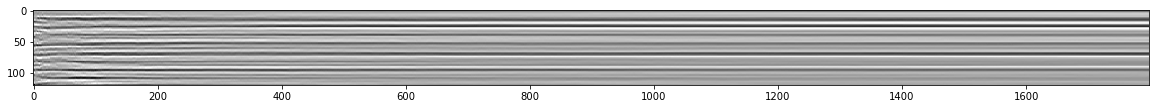

In [85]:
plt.imshow(sum_model_rand,cmap='gray')
plt.show()

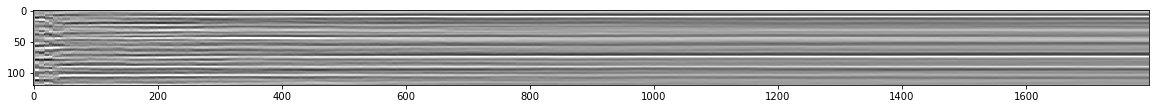

In [86]:
plt.imshow(sum_nomodel_rand,cmap='gray')
plt.show()

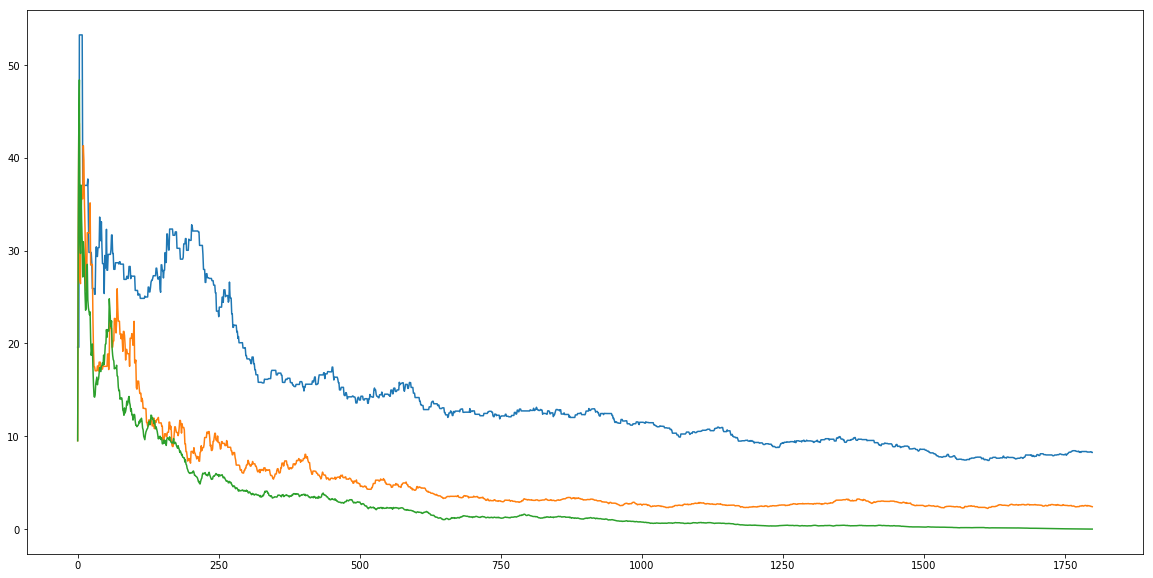

1106.0


In [87]:
plt.plot(np.sum(np.square(subs_nomodelRand_stk),axis=0))
plt.plot(np.sum(np.square(subs_modelRand_stk),axis=0))
plt.plot(np.sum(np.square(subs_convRand_stk),axis=0))
plt.show()
print(np.sum(model_indices))

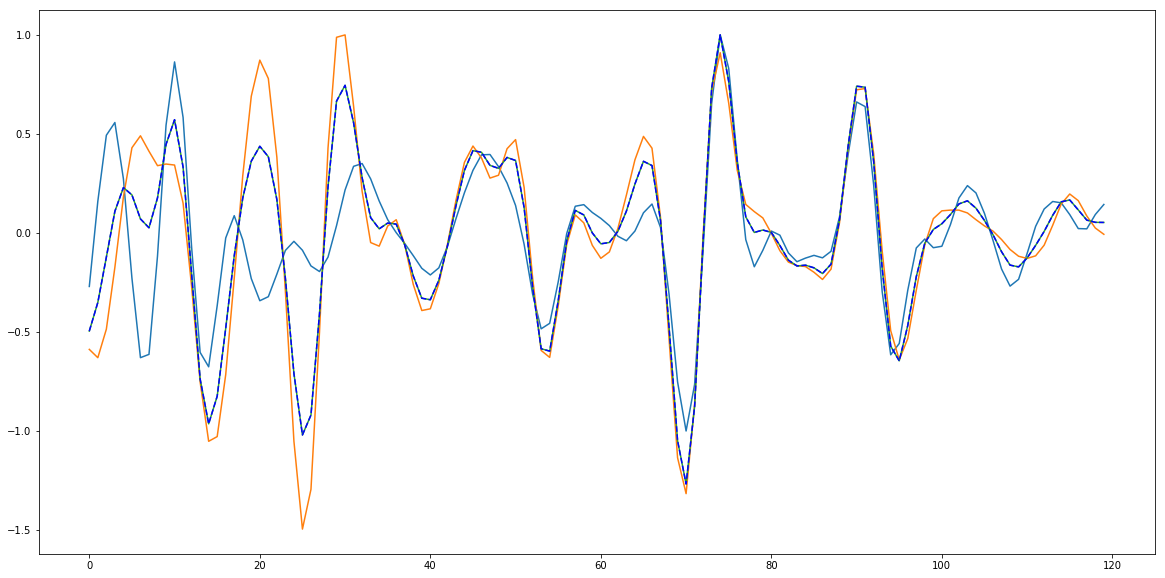

In [88]:
plt.plot(sum_nomodel_rand[:,-1:])
plt.plot(sum_model_rand[:,-1:])
plt.plot(sum_convH_rand[:,-1:])
plt.plot(stkH_comp,'b--')
plt.show()